В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import make_regression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
df = pd.read_csv("C:/Users/valeriia.karpova/Desktop/Machine L/cars.csv")
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [3]:

df.info

<bound method DataFrame.info of     Car_ID     Brand          Model  Year  Kilometers_Driven Fuel_Type  \
0        1    Toyota        Corolla  2018              50000    Petrol   
1        2     Honda          Civic  2019              40000    Petrol   
2        3      Ford        Mustang  2017              20000    Petrol   
3        4    Maruti          Swift  2020              30000    Diesel   
4        5   Hyundai         Sonata  2016              60000    Diesel   
..     ...       ...            ...   ...                ...       ...   
95      96  Mercedes        C-Class  2019              22000    Diesel   
96      97    Toyota  Innova Crysta  2017              38000    Diesel   
97      98      Ford       EcoSport  2018              26000    Petrol   
98      99   Hyundai          Verna  2019              24000    Petrol   
99     100      Tata         Altroz  2020              18000    Petrol   

   Transmission Owner_Type  Mileage  Engine  Power  Seats    Price  
0        M

In [4]:
data_types = df.dtypes
data_types

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

In [5]:
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    unique_types = df[col].apply(lambda x: type(x).__name__).unique()
    print(f"Колонка '{col}' містить типи даних: {unique_types}")

# 3. Підрахунок кількості значень у категоріальних колонках
categorical_counts = df[object_columns].nunique()
print("\nКількість унікальних значень у категоріальних колонках:")
print(categorical_counts)

# 4. Висновки щодо числових та категоріальних колонок
numerical_columns = df.select_dtypes(include=['number']).columns
binary_columns = object_columns[categorical_counts == 2]
multicategorical_nominal_columns = object_columns[categorical_counts > 2]

print(f"\nКількість числових колонок: {len(numerical_columns)}")
print(f"Кількість бінарних колонок: {len(binary_columns)}")
print(f"Кількість мультикатегоріальних колонок (без порядку): {len(multicategorical_nominal_columns)}")

Колонка 'Brand' містить типи даних: ['str']
Колонка 'Model' містить типи даних: ['str']
Колонка 'Fuel_Type' містить типи даних: ['str']
Колонка 'Transmission' містить типи даних: ['str']
Колонка 'Owner_Type' містить типи даних: ['str']

Кількість унікальних значень у категоріальних колонках:
Brand           11
Model           58
Fuel_Type        2
Transmission     2
Owner_Type       3
dtype: int64

Кількість числових колонок: 8
Кількість бінарних колонок: 2
Кількість мультикатегоріальних колонок (без порядку): 3


**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [6]:
#створюємо змінну features, що включатиме всі колонки, крім таргет-змінної "Price"
columns = df.columns.tolist()
features = [col for col in columns if col != 'Price']
print(features)

['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']


In [7]:
#Розділяємо дані на train та test
X = df[features]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [8]:
#перевірка виводу
X_train

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4
6,7,Mahindra,Scorpio,2018,45000,Diesel,Automatic,Second,15,2179,140,7
27,28,BMW,X3,2019,22000,Diesel,Automatic,Second,18,1995,187,5


**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [9]:
#кодуємо колонку Fuel_Type
fuel_codes = {'Diesel': 0, 'Petrol': 1}

# Кодуємо колонку Fuel_Type у тренувальному наборі
X_train['Fuel_Type'] = X_train['Fuel_Type'].map(fuel_codes)

# Кодуємо колонку Fuel_Type у тестовому наборі
X_test['Fuel_Type'] = X_test['Fuel_Type'].map(fuel_codes)

In [10]:
#кодуємо колонку Transmission
transmission_codes = {'Manual': 0, 'Automatic': 1}

# Кодуємо колонку Transmission у тренувальному наборі
X_train['Transmission'] = X_train['Transmission'].map(transmission_codes)

# Кодуємо колонку Transmission у тестовому наборі
X_test['Transmission'] = X_test['Transmission'].map(transmission_codes)


In [11]:
#кодуємо колонку Brand 
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Навчаємо енкодер на колонці 'Brand' тренувальних даних
encoder.fit(X_train[['Brand']])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [12]:
# Трансформуємо тренувальні дані
brand_encoded_train = encoder.transform(X_train[['Brand']])

# Трансформуємо тестові дані
brand_encoded_test = encoder.transform(X_test[['Brand']])

In [13]:
# Отримуємо імена колонок після OneHotEncoding
brand_encoded_columns = encoder.get_feature_names_out(['Brand'])

# Створюємо нові датафрейми з закодованими значеннями
brand_encoded_train_df = pd.DataFrame(brand_encoded_train, columns=brand_encoded_columns, index=X_train.index)
brand_encoded_test_df = pd.DataFrame(brand_encoded_test, columns=brand_encoded_columns, index=X_test.index)

# Видаляємо оригінальну колонку 'Brand' з X_train і X_test
X_train = X_train.drop(columns=['Brand'])
X_test = X_test.drop(columns=['Brand'])

# Додаємо закодовані колонки до X_train і X_test
X_train = pd.concat([X_train, brand_encoded_train_df], axis=1)
X_test = pd.concat([X_test, brand_encoded_test_df], axis=1)
X_train

,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen
83,84,T-Roc,2019,22000,1,1,Second,18,1498,148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,56,A5,2018,28000,0,1,First,17,1968,187,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,A6,2018,28000,1,1,First,15,1984,241,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Vento,2017,32000,1,0,Second,18,1598,103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,20,GLC,2017,26000,1,1,Second,12,1991,241,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,4,Swift,2020,30000,0,0,Third,23,1248,74,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,Mustang,2017,20000,1,1,First,10,4951,395,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,Scorpio,2018,45000,0,1,Second,15,2179,140,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27,28,X3,2019,22000,0,1,Second,18,1995,187,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [15]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
83,84,T-Roc,2019,22000,1,1,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,A5,2018,28000,0,1,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,A6,2018,28000,1,1,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Vento,2017,32000,1,0,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,GLC,2017,26000,1,1,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
17,18,Q3,2016,38000,1,1,Second,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Santro,2019,26000,1,0,Third,20,1086,68,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Vento,2017,32000,1,0,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Ertiga,2020,18000,1,0,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Aspire,2019,26000,1,0,Third,20,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

In [16]:
#Кодування колонки Model, наявні в датафреймі моделі групую за класом авто, розділяючи на Luxury, Hatchback, SUV, Sedan та Others
model_groups = {
    'Mustang': 'Luxury', 'C-Class': 'Luxury', 'Altroz': 'Hatchback', 'Verna': 'Sedan', 'Passat': 'Luxury', 'Thar': 'SUV', 'T-Roc': 'SUV',
    'BR-V': 'SUV', 'S-Cross': 'SUV', 'Tigor': 'Hatchback', 'Santro': 'Hatchback', 'Ranger': 'SUV', 'Yaris': 'Sedan', 'GLE': 'Luxury',
    '7 Series': 'Luxury', 'A3': 'Luxury', 'Ameo': 'Sedan', 'WR-V': 'SUV', 'Vitara': 'SUV', 'Safari': 'SUV', 'Elantra': 'Sedan',
    'Aspire': 'Sedan', 'Fortuner': 'SUV', 'E-Class': 'Luxury', 'X3': 'Luxury', 'A6': 'Luxury', 'Venue': 'SUV', 'Tiago': 'Hatchback',
    'XUV300': 'SUV', 'Vento': 'Sedan', 'Q7': 'Luxury', 'X5': 'Luxury', 'GLA': 'Luxury', 'Camry': 'Sedan', 'A5': 'Luxury', 
    '3 Series': 'Luxury', 'Innova Crysta': 'SUV', 'EcoSport': 'SUV', '5 Series': 'Luxury', 'GLC': 'Luxury', 'Innova': 'SUV',
    'Figo': 'Hatchback', 'Corolla': 'Sedan', 'Sonata': 'Sedan', 'Swift': 'Hatchback', 'Civic': 'Sedan', 'Ertiga': 'SUV', 
    'City': 'Sedan', 'Tiguan': 'SUV', 'Q3': 'Luxury', 'Harrier': 'SUV', 'Creta': 'SUV', 'Endeavour': 'SUV', 'Nexon': 'SUV', 
    'Scorpio': 'SUV', 'Polo': 'Hatchback', 'A4': 'Luxury', 'X1': 'Luxury'
}
# Додаємо нову колонку з згрупованими значеннями
X_train['Model_Group'] = X_train['Model'].map(model_groups).fillna('Others')
X_test['Model_Group'] = X_test['Model'].map(model_groups).fillna('Others')

In [17]:
# Створюємо OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Навчаємо енкодер на колонці 'Model_Group' тренувальних даних
encoder.fit(X_train[['Model_Group']])

# Трансформуємо тренувальні дані
model_group_encoded_train = encoder.transform(X_train[['Model_Group']])

# Трансформуємо тестові дані
model_group_encoded_test = encoder.transform(X_test[['Model_Group']])

# Отримуємо імена колонок після OneHotEncoding
model_group_encoded_columns = encoder.get_feature_names_out(['Model_Group'])

# Створюємо нові датафрейми з закодованими значеннями
model_group_encoded_train_df = pd.DataFrame(model_group_encoded_train, columns=model_group_encoded_columns, index=X_train.index)
model_group_encoded_test_df = pd.DataFrame(model_group_encoded_test, columns=model_group_encoded_columns, index=X_test.index)


In [18]:
# Видаляємо оригінальну колонку 'Model' та 'Model_Group' з X_train і X_test
X_train = X_train.drop(columns=['Model', 'Model_Group'])
X_test = X_test.drop(columns=['Model', 'Model_Group'])

# Додаємо закодовані колонки до X_train і X_test
X_train = pd.concat([X_train, model_group_encoded_train_df], axis=1)
X_test = pd.concat([X_test, model_group_encoded_test_df], axis=1)

# Перевіряємо результати
print("X_train:\n", X_train)
print("\nX_test:\n", X_test)


X_train:
     Car_ID  Year  Kilometers_Driven  Fuel_Type  Transmission Owner_Type  \
83      84  2019              22000          1             1     Second   
55      56  2018              28000          0             1      First   
26      27  2018              28000          1             1      First   
54      55  2017              32000          1             0     Second   
19      20  2017              26000          1             1     Second   
..     ...   ...                ...        ...           ...        ...   
3        4  2020              30000          0             0      Third   
2        3  2017              20000          1             1      First   
6        7  2018              45000          0             1     Second   
27      28  2019              22000          0             1     Second   
75      76  2019              22000          0             1      First   

    Mileage  Engine  Power  Seats  Brand_Audi  Brand_BMW  Brand_Ford  \
83       18    14

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [19]:
X_train = X_train.select_dtypes(include = 'number')
train_data = pd.concat([X_train, y_train], axis=1)

# Побудуємо матрицю кореляції
correlation_matrix = train_data.corr()

# Виведемо матрицю кореляції
print(correlation_matrix)


                         Car_ID      Year  Kilometers_Driven  Fuel_Type  \
Car_ID                 1.000000  0.137027          -0.356614   0.090537   
Year                   0.137027  1.000000          -0.708525   0.248515   
Kilometers_Driven     -0.356614 -0.708525           1.000000  -0.332351   
Fuel_Type              0.090537  0.248515          -0.332351   1.000000   
Transmission          -0.084381 -0.200603          -0.066491  -0.005775   
Mileage                0.100891  0.278559          -0.126621  -0.070112   
Engine                -0.089284 -0.392764           0.101219  -0.174455   
Power                 -0.006319 -0.248442          -0.060803   0.076357   
Seats                 -0.063793 -0.278755           0.403656  -0.412468   
Brand_Audi             0.089473 -0.256523           0.095879  -0.008336   
Brand_BMW              0.048335  0.202517          -0.247042  -0.048475   
Brand_Ford            -0.020240 -0.150454          -0.009761   0.109812   
Brand_Honda           -0.

In [20]:
# Знайдемо колонки, які корелюють з цільовою змінною більше ніж на 0.5 за модулем
target_correlations = correlation_matrix['Price'].abs()
high_correlation_features = target_correlations[target_correlations > 0.5].index.tolist()

print("Колонки, які корелюють з цільовою змінною на більше ніж 0.5 за модулем:", high_correlation_features)

Колонки, які корелюють з цільовою змінною на більше ніж 0.5 за модулем: ['Transmission', 'Mileage', 'Engine', 'Power', 'Model_Group_Luxury', 'Price']


Отже, колонки, що найбільше корелюють з цільовою змінною:
- Transmission (тип коробки передач)
- Mileage (пробіг)
- Engine (двигун)
- Power (потужність)
- Model Group Luxury (підгрупа для преміум моделей авто). З цікавого - інші підгрупи, в які об'єднали моделі на попередніх етапах, корелюють менше, ніж підгрупа Luxury, що загалом виглядає цілком логічним. 

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [21]:
X_test = X_test.select_dtypes(include = 'number')

In [22]:
# Створюємо і одразу тренуємо модель
model = LinearRegression().fit(X_train, y_train)

# Робимо передбачення моделлю
predictions = model.predict(X_test)
train_predictions = model.predict(X_train)
# Рахуємо втрати
rmse = root_mean_squared_error(y_test, predictions)
print('Loss:', rmse)

Loss: 295934.13531739026


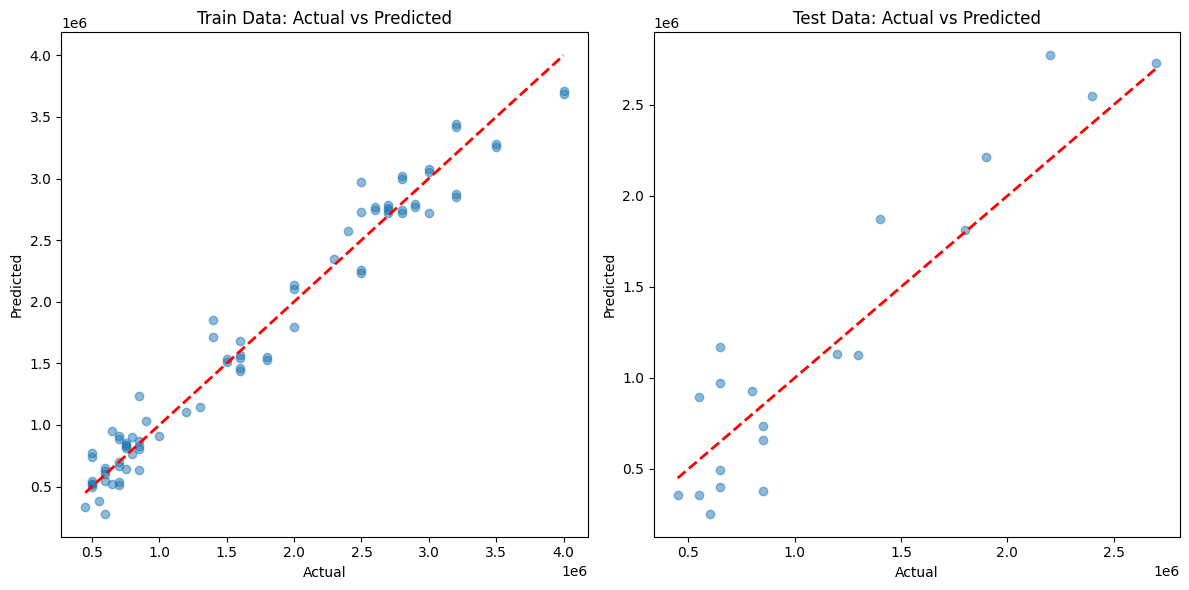

In [23]:
plt.figure(figsize=(12, 6))

# Графік розсіювання для тренувальних даних
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Train Data: Actual vs Predicted')

# Графік розсіювання для тестових даних
plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data: Actual vs Predicted')

plt.tight_layout()
plt.show()

З графіка можемо зробити висновок, що на тестових значеннях модель працює значно гірше, ніж на тренувальному наборі. 

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  #використовую fit_transform, щоб не лише обчислити параметри, а й застосувати їх до даних 
X_test_scaled = scaler.transform(X_test)

In [25]:
# Створюємо і тренуємо модель
model_scaled = LinearRegression().fit(X_train_scaled, y_train)

# Робимо передбачення моделлю
predictions_scaled = model_scaled.predict(X_test_scaled)

# Рахуємо втрати
rmse = root_mean_squared_error(y_test, predictions_scaled)
print('Loss:', rmse)

Loss: 295934.1353173567


Бачимо, що Loss моделі має таке ж значення, як і до масштабування даних. 

In [28]:
# Отримуємо коефіцієнти моделі
coefficients = model_scaled.coef_
coefficients

array([ -19122.01801837,  -38112.45502604, -110773.09854203,
       -184992.14808336,  165823.00775635, -120435.86159258,
        -58344.16786115,  586334.3798558 ,  -51641.08539709,
        282738.41532951,  283204.38592377, -138959.33200039,
        -96109.36893548, -162827.1176754 , -178534.67860521,
       -161141.31038136,  274682.8506509 , -165493.69096983,
         12275.89912505,  -78130.4562299 ,    2686.13132523,
        118957.66188115, -176462.2525393 ,  121066.93166727,
        -24035.4520623 ])

In [29]:
# Отримуємо імена колонок
feature_names = X_train.columns

# Створюємо DataFrame для зручного відображення коефіцієнтів
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Сортуємо за абсолютним значенням коефіцієнта
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Відображаємо результати
print(coef_df[['Feature', 'Coefficient']])

                  Feature    Coefficient
7                   Power  586334.379856
10              Brand_BMW  283204.385924
9              Brand_Audi  282738.415330
16         Brand_Mercedes  274682.850651
3               Fuel_Type -184992.148083
14         Brand_Mahindra -178534.678605
22     Model_Group_Luxury -176462.252539
4            Transmission  165823.007756
17             Brand_Tata -165493.690970
13          Brand_Hyundai -162827.117675
15           Brand_Maruti -161141.310381
11             Brand_Ford -138959.332000
23        Model_Group_SUV  121066.931667
5                 Mileage -120435.861593
21  Model_Group_Hatchback  118957.661881
2       Kilometers_Driven -110773.098542
12            Brand_Honda  -96109.368935
19       Brand_Volkswagen  -78130.456230
6                  Engine  -58344.167861
8                   Seats  -51641.085397
1                    Year  -38112.455026
24      Model_Group_Sedan  -24035.452062
0                  Car_ID  -19122.018018
18           Bra

Аналіз коефіцієнтів і висновки:
1) Найбільше на ціну авто впливає змінна Power, що цілком логічно, адже потужніші авто коштуватимуть дорожче.
2) Змінні Brand_BMW, Brand_Audi, Brand_Mercedes також значно впливають на збільшення ціни, адже це преміум-бренди авто. На противагу їм бюджетніші бренди (змінна  Brand_Mahindra, Brand_Tata, Brand_Hyundai, Brand_Maruti, Brand_Ford, Brand_Honda, Brand_Volkswagen) мають від"ємний коефіцієнт, а отже сприяють зменшенню ціни. 
3) По впливу змінної Fuel_Type важко зробити висновок, адже могли бути закономірності типу палива і моделей/брендів авто.
4) Змінна Transmission сприяє збільшенню ціни, що є логічним, адже при кодуванні автоматичний тип коробки передач було закодовано в коефіцієнт 1.0, тобто маємо підтвердження, що авто з автоматичною коробкою передач коштують дорожче. 
5) Mileage сприяє зменшенню ціни, адже більший розхід палива є недоліком. Kilometers_Driven також сприяє зменшенню ціни, що логічно, бо більший пробіг авто є недоліком. 
6) Зараз нелогічним виглядає вектор впливу Model_Group_Luxury та Year, а також  Owner_Type_Codes. 

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [35]:
# Додаємо константу для моделі
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

In [37]:
# Натренуємо модель
model_statsmodels = sm.OLS(y_train, X_train_scaled).fit()

# Виведемо звіт
summary = model_statsmodels.summary()
print(summary)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     73.40
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           9.85e-34
Time:                        00:32:56   Log-Likelihood:                -1083.9
No. Observations:                  80   AIC:                             2216.
Df Residuals:                      56   BIC:                             2273.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   2.48e+04     67.865      0.0

In [39]:
# Виведемо p-values для всіх коефіцієнтів
p_values = model_statsmodels.pvalues

# Визначимо ознаки, які є статистично значущими на рівні значущості 0.05
significant_features = p_values[p_values < 0.05].index.tolist()

# Виключаємо константу зі списку значущих ознак
significant_features = [feature for feature in significant_features if feature != 'const']

print("Статистично значущі ознаки на рівні значущості 0.05:")
print(significant_features)


Статистично значущі ознаки на рівні значущості 0.05:
['x4', 'x5', 'x8', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x20', 'x22', 'x23', 'x24']


In [40]:
# Отримуємо оригінальні імена колонок
original_feature_names = ['const'] + X_train.columns.tolist()

# Розкодовуємо ознаки
decoded_features = [original_feature_names[int(feature[1:])] for feature in significant_features]

print("Розкодовані статистично значущі ознаки:")
print(decoded_features)

Розкодовані статистично значущі ознаки:
['Fuel_Type', 'Transmission', 'Power', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes', 'Brand_Tata', 'Brand_Volkswagen', 'Model_Group_Hatchback', 'Model_Group_Luxury', 'Model_Group_SUV']


**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [41]:
# Виберемо статистично значущі ознаки
X_train_significant = X_train[decoded_features]
X_test_significant = X_test[decoded_features]

# Масштабуємо ці ознаки
X_train_significant_scaled = scaler.fit_transform(X_train_significant)
X_test_significant_scaled = scaler.transform(X_test_significant)

# Додаємо константу для моделі
X_train_significant_scaled = sm.add_constant(X_train_significant_scaled)
X_test_significant_scaled = sm.add_constant(X_test_significant_scaled)

# Натренуємо модель тільки на статистично значущих ознаках
model_significant = sm.OLS(y_train, X_train_significant_scaled).fit()

summary_significant = model_significant.summary()
print(summary_significant)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     102.7
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           7.94e-39
Time:                        00:39:44   Log-Likelihood:                -1089.5
No. Observations:                  80   AIC:                             2213.
Df Residuals:                      63   BIC:                             2253.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06    2.5e+04     67.130      0.0

In [42]:
# Показники для повної моделі
r2_full = model_statsmodels.rsquared
adj_r2_full = model_statsmodels.rsquared_adj

# Показники для моделі зі значущими ознаками
r2_significant = model_significant.rsquared
adj_r2_significant = model_significant.rsquared_adj

print("R^2 повної моделі:", r2_full)
print("Adjusted R^2 повної моделі:", adj_r2_full)
print("R^2 моделі зі значущими ознаками:", r2_significant)
print("Adjusted R^2 моделі зі значущими ознаками:", adj_r2_significant)


R^2 повної моделі: 0.967894625221605
Adjusted R^2 повної моделі: 0.954708489151907
R^2 моделі зі значущими ознаками: 0.9630871465520523
Adjusted R^2 моделі зі значущими ознаками: 0.9537124536128909


Висновок: незважаючи на видалення незначущих ознак, показники R2 і Adj. R-squared майже не змінилися. 

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [43]:
# Визначимо ознаки, які є статистично значущими на рівні значущості 0.25
significant_features_025 = p_values[p_values < 0.25].index.tolist()

# Виключаємо константу зі списку значущих ознак
significant_features_025 = [feature for feature in significant_features_025 if feature != 'const']

print("Статистично значущі ознаки на рівні значущості 0.25:")
print(significant_features_025)

Статистично значущі ознаки на рівні значущості 0.25:
['x3', 'x4', 'x5', 'x6', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x20', 'x22', 'x23', 'x24']


In [44]:
# Отримуємо оригінальні імена колонок
original_feature_names = ['const'] + X_train.columns.tolist()

# Розкодовуємо ознаки
decoded_features_025 = [original_feature_names[int(feature[1:])] for feature in significant_features_025]

print("Розкодовані статистично значущі ознаки:")
print(decoded_features_025)

Розкодовані статистично значущі ознаки:
['Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Mileage', 'Power', 'Seats', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes', 'Brand_Tata', 'Brand_Volkswagen', 'Model_Group_Hatchback', 'Model_Group_Luxury', 'Model_Group_SUV']


In [45]:
# Виберемо статистично значущі ознаки
X_train_significant_025 = X_train[decoded_features_025]
X_test_significant_025 = X_test[decoded_features_025]

# Масштабуємо ці ознаки
X_train_significant_scaled_025 = scaler.fit_transform(X_train_significant_025)
X_test_significant_scaled_025 = scaler.transform(X_test_significant_025)

# Додаємо константу для моделі
X_train_significant_scaled_025 = sm.add_constant(X_train_significant_scaled_025)
X_test_significant_scaled_025 = sm.add_constant(X_test_significant_scaled_025)

# Натренуємо модель тільки на статистично значущих ознаках
model_significant_025 = sm.OLS(y_train, X_train_significant_scaled_025).fit()

summary_significant_025 = model_significant_025.summary()
print(summary_significant_025)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     93.72
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           1.94e-37
Time:                        00:51:30   Log-Likelihood:                -1084.5
No. Observations:                  80   AIC:                             2209.
Df Residuals:                      60   BIC:                             2257.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   2.41e+04     69.717      0.0

In [46]:
# Показники для моделі зі значущими ознаками
r2_significant_025 = model_significant_025.rsquared
adj_r2_significant_025 = model_significant_025.rsquared_adj

print("R^2 повної моделі:", r2_full)
print("Adjusted R^2 повної моделі:", adj_r2_full)
print("R^2 моделі зі значущими ознаками:", r2_significant)
print("Adjusted R^2 моделі зі значущими ознаками:", adj_r2_significant)
print("R^2 моделі з ознаками p-value <0.25:", r2_significant_025)
print("Adjusted R^2 моделі з ознаками  p-value <0.25:", adj_r2_significant_025)

R^2 повної моделі: 0.967894625221605
Adjusted R^2 повної моделі: 0.954708489151907
R^2 моделі зі значущими ознаками: 0.9630871465520523
Adjusted R^2 моделі зі значущими ознаками: 0.9537124536128909
R^2 моделі з ознаками p-value <0.25: 0.96740461730139
Adjusted R^2 моделі з ознаками  p-value <0.25: 0.9570827461134969


Висновок: бачимо, що при навчанні моделі на ознаках для яких p-value <0.25, R^2 незначно зменшився, у порівнянні з першою версією моделі, що включала в себе всі ознаки. Найбільш оптимальною серед трьох моделей вважаю модель зі значущими ознаками (p-value < 0.05), так як ці модель включає в себе менше ознак, ніж перша (всі ознаки) та третя (p-value < 0.25), але при цьому показники R^2 та Adjusted R^2 близькі до першої та третьої моделей. Отже, можна зробити висновок, що найбільш значущими є ознаки з p-value <0.05, тобто модель забезпечує якість на меншій кількості ознак, а отже легше масштабувати модель. 